## Time Series Visualization - Customer Price Index -Europe Area

#### 1. Information about dataset from Nasdqa
#### 2. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Customer Price Index -Europe Area

#### 1. Information about dataset from Nasdqa
    - Source : https://data.nasdaq.com/data/RATEINF-inflation-rates
    
    -DESCRIPTION: Inflation Rates and the Consumer Price Index CPI for Argentina, Australia, Canada, Germany, Euro area, France, Italy, Japan, New Zealand and more. Here are used the Cunsumer Price Index CPI for Europe until 28.02.2023

## 2. Importing your libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import quandl
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
quandl.ApiConfig.api_key = 'ySqjP_yURK4gP-xeBSCo'


In [3]:
data = quandl.get('RATEINF/CPI_EUR')

In [4]:
data.head()

,Value
Date,
1990-01-31,69.46
1990-02-28,69.71
1990-03-31,69.88
1990-04-30,70.14
1990-05-31,70.30


In [9]:
data.shape

(398, 1)

In [10]:
data.columns

Index(['Value'], dtype='object')

In [11]:
type(data)

pandas.core.frame.DataFrame

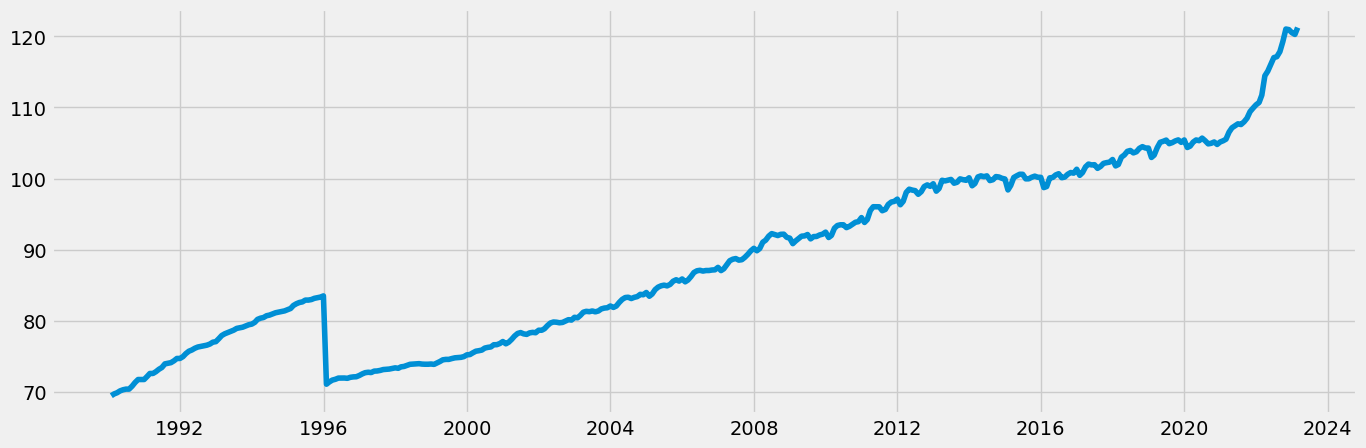

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

## 2. Subsetting, wrangling, and cleaning time-series data

In [13]:
# Reset index so that you can use the "Date" column as a filter

data_1 = data.reset_index()

In [14]:
data_1.head()

,Date,Value
0,1990-01-31,69.46
1,1990-02-28,69.71
2,1990-03-31,69.88
3,1990-04-30,70.14
4,1990-05-31,70.30


In [15]:
data_sub = data_1.loc[(data_1['Date'] >= '2008-01-01') & (data_1['Date'] < '2023-03-01')]

In [16]:
data_sub.shape

(182, 2)

In [17]:
data_sub.tail()

,Date,Value
393,2022-10-31,121.03
394,2022-11-30,120.95
395,2022-12-31,120.52
396,2023-01-31,120.27
397,2023-02-28,121.24


In [18]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2008-01-31,89.85
2008-02-29,90.16
2008-03-31,91.05
2008-04-30,91.34
2008-05-31,91.91


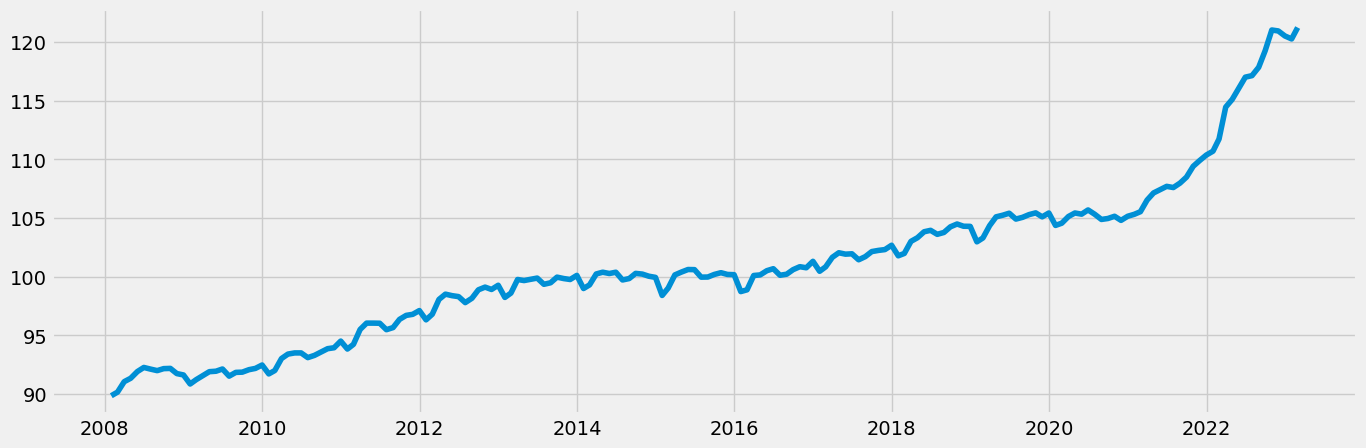

In [19]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [20]:
data_sub.shape

(182, 1)

In [21]:
# Check for missing values 

data_sub.isnull().sum() # No missing values.

Value    0
dtype: int64

In [22]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

15

In [23]:
duplicated_rows = data_sub[data_sub.duplicated()]
print(duplicated_rows) # 15 rows have the same value but not the same datetime, so here we don't have duplicated rows.

             Value
datetime          
2009-11-30   92.18
2010-06-30   93.50
2011-05-31   96.04
2013-11-30   99.76
2014-06-30  100.38
2014-08-31   99.84
2015-07-31   99.96
2015-11-30  100.19
2016-02-29   98.88
2016-04-30  100.15
2016-09-30  100.60
2019-11-30  105.10
2020-04-30  105.43
2020-12-31  105.15
2021-01-31  105.32


## 3. Time-series analysis: decomposition 

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [25]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

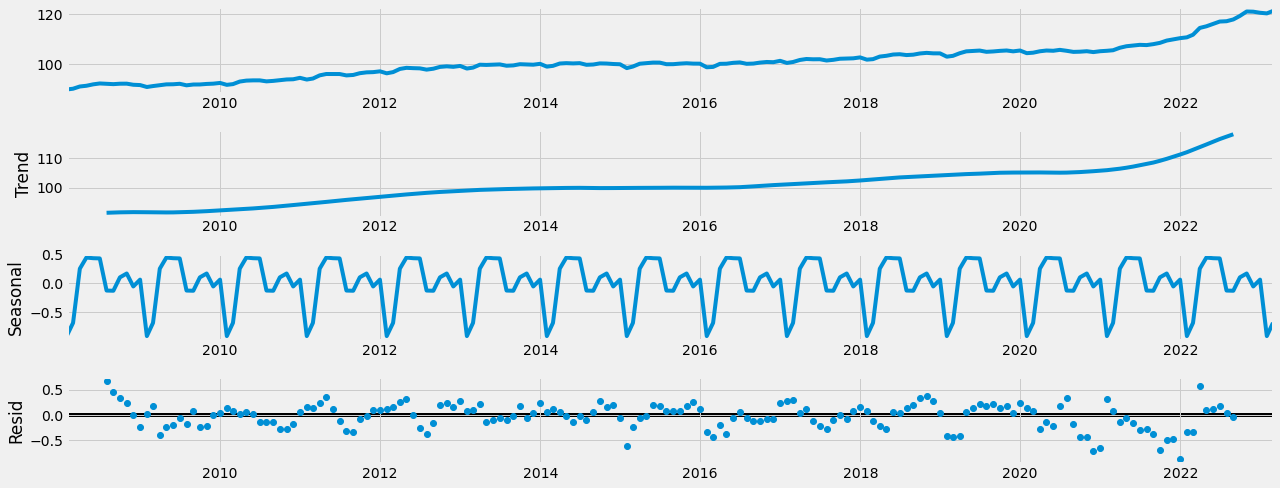

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

## 4. Testing for stationarity Customer Price Index -Europe Area

In [27]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
   
# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.731733
p-value                          0.990450
Number of Lags Used             14.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


#### Note: Test STatistic is larger then Critical Value(5%) = can’t reject null hypothesis. There is a unit root in your data, and the data is non-stationary.

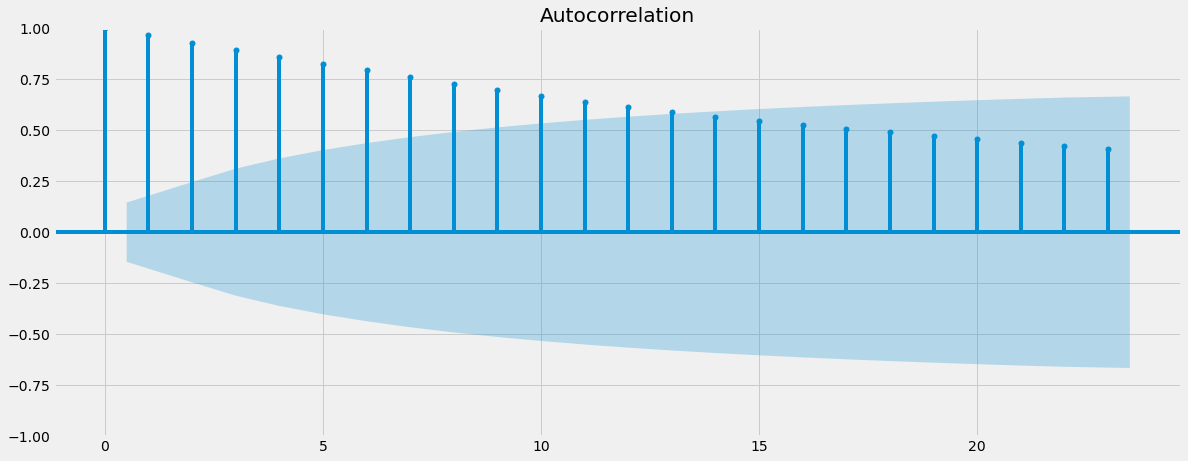

In [28]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

#### Note: The Customer Price Index -Europe Area time series has quite a few lags correlated with each other. This means there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test conducted earlier.

## 5. Stationarizing the Customer Price Index -Europe Area

In [29]:
data_sub_1 = data_sub - data_sub.shift(1)

In [30]:
data_sub_1.dropna(inplace = True) 

In [31]:
data_sub_1.head()

,Value
datetime,
2008-02-29,0.31
2008-03-31,0.89
2008-04-30,0.29
2008-05-31,0.57
2008-06-30,0.35


In [32]:
data_sub_1.columns

Index(['Value'], dtype='object')

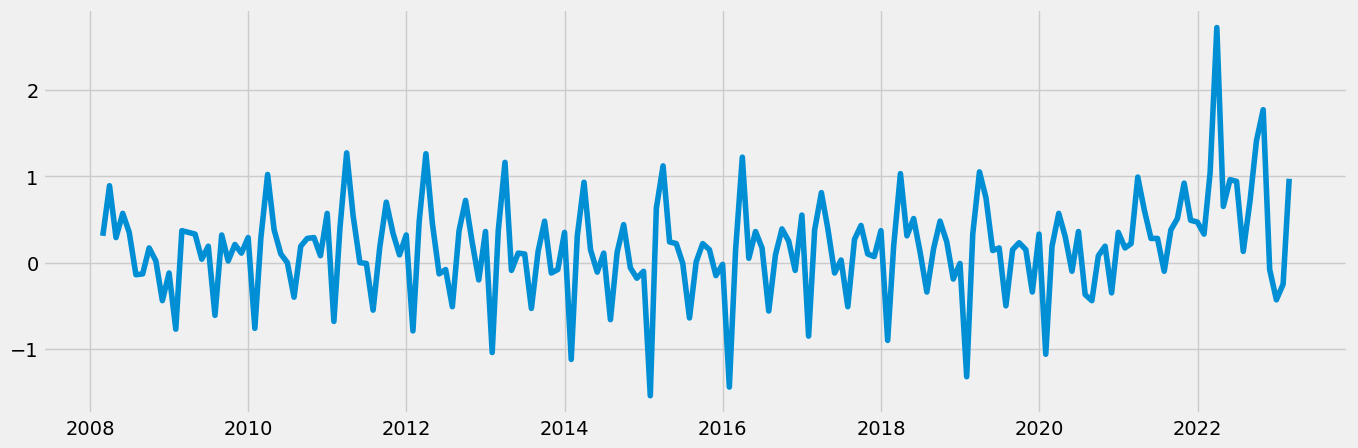

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_1)

In [34]:
dickey_fuller(data_sub_1)

Dickey-Fuller Stationarity test:
Test Statistic                  -0.667781
p-value                          0.854919
Number of Lags Used             13.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


In [35]:
# Repear round of differencing
data_sub_2 = data_sub_1 - data_sub_1.shift(1)

In [36]:
data_sub_2.dropna(inplace = True) 

In [37]:
data_sub_2.head()

,Value
datetime,
2008-03-31,0.58
2008-04-30,-0.60
2008-05-31,0.28
2008-06-30,-0.22
2008-07-31,-0.49


In [38]:
data_sub_2.columns

Index(['Value'], dtype='object')

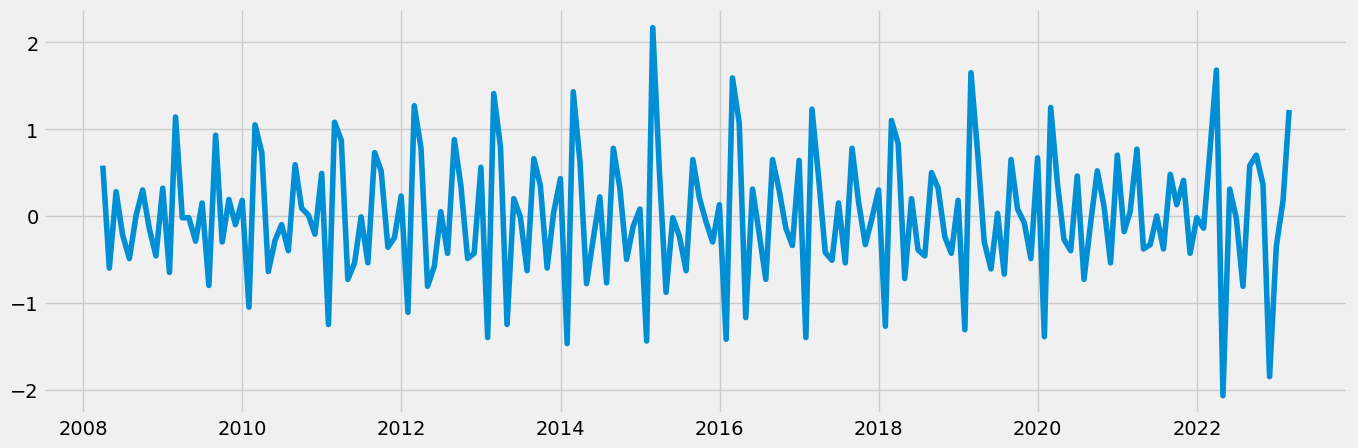

In [39]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_2)

In [40]:
dickey_fuller(data_sub_2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.723641e+00
p-value                        3.432973e-09
Number of Lags Used            1.100000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


#### Note:  In this case, the test statistic is -6.723641, which is much smaller than the critical values at all three significance levels (1%, 5%, and 10%). This suggests that the time series is stationary, as it does not exhibit strong evidence of a trend. The p-value is 3.432973e-09, which is much smaller than the significance level of 0.05. Therefore, there is strong evidence against the null hypothesis, and the time series is likely stationary.

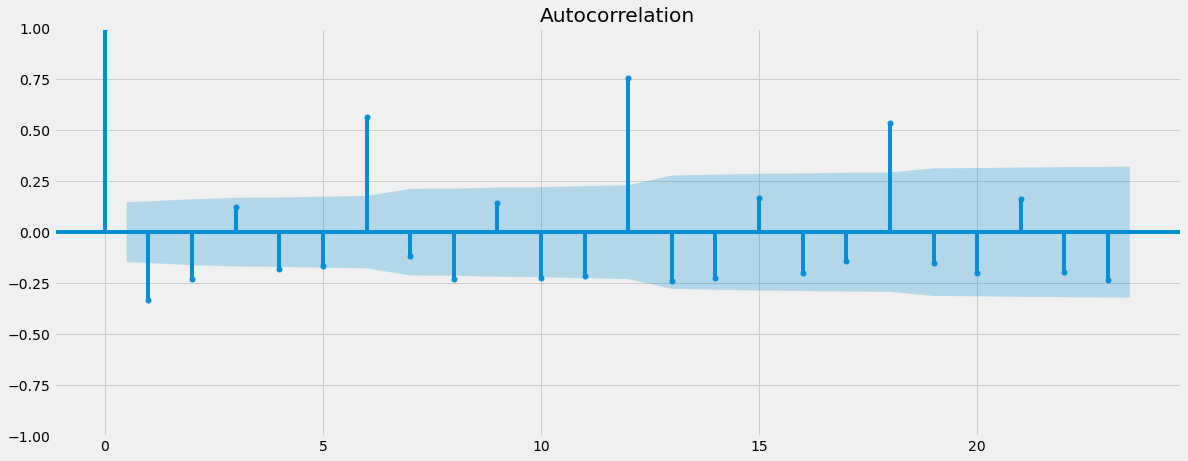

In [41]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_2)
plt.show()

#### Note: The autocorrelation plot has improved, this means that there are fewer significant correlations between the time series and its lagged values. This suggests that the underlying trend or seasonality in the time series has decreased, which can be an indication of stationarity.